<a href="https://colab.research.google.com/github/bruna-calistrate/DataWrangling-Case1/blob/main/Case_1_Data_Wrangling_Daily_Happiness_%26_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling e Data Cleaning

Se você fosse gerente em uma empresa, o que você faria
de diferente caso descobrisse que alguns de seus
funcionários estão pensando em sair? 

Daria um aumento, buscaria contratar outro ou tentaria ver como melhorar? De toda forma, ter essa informação seria útil e evitaria muitos problemas!

Neste exercício simularemos a etapa de Data Preparation através da limpeza e estruturação dos dados que servirão de insumo para a construção do modelo preditivo mencionado acima.



Daily Happiness & Employee Turnover


Is There a Relationship Between Employee Happiness and Job Turnover?


Dataset: https://www.kaggle.com/harriken/employeeturnover


## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

## Data Understanding

### Contextualização

> No verão de 2016, em Barcelona, o CEO da myhappyforce, Alex Rios, explica o funcionamento de seu aplicativo onde funcionários registram diariamente o seu nível de felicidade no trabalho. Esse aplicativo é utilizado por empresas para rastrear a felicidade de seus empregados. 
>
>Os dados foram disponibilidados de forma anonimizada para melhor entendimento do turnover de funcionários e para possibilitar a criação de um modelo que consiga predizer quais empregados irão sair da empresa.

### Problema do negócio

Se você fosse gerente em uma empresa, o que você faria diferente caso descobrisse que alguns de seus funcionários estão pensando em sair? Daria um aumento, buscaria contratar outro ou tentaria ver como melhorar? De toda forma, seria útil e evitaria muitos problemas!

### Importar arquivos

**df_votes** - voto de um funcionário ao abrir o aplicativo e responder à pergunta "Quão feliz você está no trabalho hoje?". Para votar, o funcionário indica o seu sentimento tocando em um dos quatro ícones na tela.

**Tamanho** - 4 colunas e 221.232 linhas
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **voteDate**: data da votação 
  * tipo object deve ser convertido pra datetime, sem valores nulos
* **vote**: voto do empregado (1-4)
  * tipo int, sem valores nulos


In [2]:
df_votes = pd.read_csv(
    'https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/dados/votes.csv'
    )

df_votes.head(3)

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4


In [3]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221232 entries, 0 to 221231
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      221232 non-null  int64 
 1   companyAlias  221232 non-null  object
 2   voteDate      221232 non-null  object
 3   vote          221232 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ MB


In [4]:
df_votes.describe()

,employee,vote
count,221232.000000,221232.000000
mean,172.119562,2.861530
std,172.723491,0.986078
min,1.000000,1.000000
25%,50.000000,2.000000
50%,127.000000,3.000000
75%,222.000000,4.000000
max,999.000000,4.000000


**df_comments** - após votar, uma nova tela aparece onde o funcionário pode incluir um comentário explicando o seu sentimento. Aqui os comentários estão anonimizados.

**Tamanho** - 7 colunas e 82.756 linhas
* **employee**: número do funcionário (-217-999)
  * tipo int, sem valores nulos
  * não pode ser negativo, deve ser tratado
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **commentId**: código hash do comentário
 * tipo object, sem valores nulos
* **txt**: conteúdo anonimizado do comentário, com a mesma quantidade de caracteres original
 * tipo object, com alguns valores nulos
* **likes**: quantidade de curtidas (0-86)
  * tipo float deve ser convertido para int, contém 1 valor nulo
  * média de 6,9, sendo que até 75% dos funcionários obtiveram 9 curtidas
* **dislikes**: quantidade de descurtidas (0-53)
  * tipo float, deve ser convertido para int, contém 1 valor nulo
  * média de 1,3, sendo que até 75% dos funcionários obtiveram 1 descurtida
* **commentDate**: data de postagem do comentário
  * tipo object deve ser convertido para datetime, contém 1 valor nulo

In [5]:
df_comments = pd.read_csv(
    'https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/dados/comments_clean_anonimized.csv'
    )

df_comments.head(3)

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017


In [6]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82756 entries, 0 to 82755
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee      82756 non-null  int64  
 1   companyAlias  82756 non-null  object 
 2   commentId     82756 non-null  object 
 3   txt           82539 non-null  object 
 4   likes         82755 non-null  float64
 5   dislikes      82755 non-null  float64
 6   commentDate   82755 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.4+ MB


In [7]:
df_comments.describe()

,employee,likes,dislikes
count,82756.000000,82755.000000,82755.000000
mean,135.108427,6.873107,1.270534
std,161.530227,7.704659,2.715937
min,-217.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,102.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


**df_interactions** - depois de comentar, uma nova tela aparece onde o funcionário pode ver os comentários de seus colegas com as ações de curtir ou descurtir.

**Tamanho** - 5 colunas e 336.960 linhas
* **employee**: número do funcionário (-218-999)
 * tipo int, sem valores nulos 
 * não pode conter valores negativos
* **companyAlias**: código hash da empresa
 * tipo object, sem valores nulos
* **liked**: com ou sem curtida
 * tipo object deve ser convertido em bool, com 1 valor nulo
* **disliked**: com ou sem descurtida
 * tipo object deve ser convertido em bool, com 1 valor nulo
* **commentId**: código do comentário
 * tipo object, com 1 valor nulo

In [8]:
df_interactions = pd.read_csv(
    'https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/dados/commentInteractions.csv'
    )

df_interactions.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070


In [9]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336960 entries, 0 to 336959
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      336960 non-null  int64 
 1   companyAlias  336960 non-null  object
 2   liked         336959 non-null  object
 3   disliked      336959 non-null  object
 4   commentId     336959 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


In [10]:
df_interactions.describe()

,employee
count,336960.000000
mean,162.879475
std,182.069656
min,-218.000000
25%,38.000000
50%,122.000000
75%,212.000000
max,999.000000


**df_churn** - status do funcionário, se continua ou não na empresa (saiu ou foi demitido)

**Tamanho** - 5 colunas e 4.847 linhas
* **employee**: número do funcionário (-218-999)
  * tipo int, sem valores nulos
  * não pode ser negativo
* **companyAlias**: código hash da empresa
 * tipo object, sem valores nulos
* **numVotes**: quantidade de votos (0-740)
  * tipo int, sem valores nulos
  * média de 45,9 votos, sendo que 75% dos funcionários votaram até 59 vezes
* **lastPartcipationDate**: data da última participação
 * tipo object deve ser convertido para datetime, com 1 valor nulo
* **stillExists**: se o funcionário ainda trabalha na empresa ou não
 * tipo bool, sem valores nulos

In [11]:
df_churn = pd.read_csv(
    'https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-Case1/main/dados/churn.csv'
    )

df_churn.head(3)

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True


In [12]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee               4847 non-null   int64 
 1   companyAlias           4847 non-null   object
 2   numVotes               4847 non-null   int64 
 3   lastParticipationDate  4847 non-null   object
 4   stillExists            4847 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 156.3+ KB


In [13]:
df_churn.describe()

,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


#### a) Qual a sua variável target?

Como o cliente quer prever o churn de seus funcionários, as features **stillExists** e **lastParticipationDate** do dataset **df_churn** são de maior importância para o treinamento dos dados.

#### b) Quais as colunas do seu dataset e podem te ajudar a prever a informação desejada?

* **df_votes**:
  * **vote**: para avaliar a sensação de felicidade diária dos funcionários
  * há quanto tempo o funcionário avaliou pela última vez
* **df_comments**:
  * **commentId**: código de cada comentário
  * **likes** e **dislikes**: para avaliar o quanto outros colegas concordam com a avaliação individual
  * quantidade de dias entre comentário e churn
* **df_interactions**:
  * **liked** e **disliked**: funcionários que curtiram ou descurtiram comentários de seus colegas
* **df_churn**:
  * **numVotes**: quantidade de avaliações por funcionário

#### c) Existem outras informações que poderiam te ajudar a prever?

* Informações sobre o mercado de trabalho na Espanha em 2016
* Média de avaliação da empresa em sites coorporativos
* Número de funcionados da companhia no LinkedIn

#### d) Como os 4 datasets se relacionam? Quais as chaves de cada um?

Todos datasets se relacionam através da combinação das features **employee** e **companyAlias**. Em complemento, as bases **df_comments** e **df_interations** também se relacionam através da feature **commentId**.

#### e) Filtre o comentário de id **58cff8cde010990004e37f6a** nas bases **df_comments** e **df_interactions**. Qual a diferença?

Na base **df_comments**, está listado o comentário realizado pelo funcionário, sua data de publicação, quantos **likes** e **dislikes** e o seu conteúdo anonimizado. Também é possível perceber que a entrada deste comentário está duplicada no dataset.

Já na base **df_interactions**, estão listadas as interações com esse comentário, indicando quais funcionários interagiram, se curtiram ou não e a data.

In [14]:
df_comments.loc[df_comments['commentId'] == 
                '58cff8cde010990004e37f6a']

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
5115,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017


In [15]:
df_interactions.loc[df_interactions['commentId'] == 
                    '58cff8cde010990004e37f6a']

,employee,companyAlias,liked,disliked,commentId
7,164,56aec740f1ef260003e307d6,True,False,58cff8cde010990004e37f6a
8,34,56aec740f1ef260003e307d6,True,False,58cff8cde010990004e37f6a
9,152,56aec740f1ef260003e307d6,True,False,58cff8cde010990004e37f6a


#### f) Qual(is) chave(s) se relaciona(m) entre elas?

As features **commentId** e **companyAlias**

## Data Preparation




### Formatação e ajuste dos dados

#### Correção das informações de data

In [16]:
df_votes['voteDate'] = pd.to_datetime(
    df_votes['voteDate'], infer_datetime_format=True
    )
df_comments['commentDate'] = pd.to_datetime(
    df_comments['commentDate'], infer_datetime_format=True
    )
df_churn['lastParticipationDate'] = pd.to_datetime(
    df_churn['lastParticipationDate'], infer_datetime_format=True
    )

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [17]:
df_churn.head(3)

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,2017-02-23 12:48:04,True
1,-2,56aec740f1ef260003e307d6,0,2017-01-18 14:00:55,False
2,2,56aec740f1ef260003e307d6,72,2017-03-17 01:00:00,True


#### Remoção de valores nulos e tratamento de colunas

* As linhas com apenas valores nulos das tabelas **df_interactions** e **df_comments**

In [18]:
df_interactions.shape

(336960, 5)

In [19]:
df_interactions.dropna(axis=0,
                       how='any',
                       inplace=True)

In [20]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336959 entries, 0 to 336958
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      336959 non-null  int64 
 1   companyAlias  336959 non-null  object
 2   liked         336959 non-null  object
 3   disliked      336959 non-null  object
 4   commentId     336959 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.4+ MB


In [21]:
df_interactions.head(3)

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070


In [22]:
df_comments.shape

(82756, 7)

In [23]:
df_comments.dropna(axis=0, how='any', thresh=4, inplace=True)

In [24]:
df_comments['carac'] = df_comments['txt'].str.len()
df_comments.drop(columns=['txt'], inplace=True)
df_comments['carac'].fillna(value=0,
                            inplace=True)

In [25]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82755 entries, 0 to 82754
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   employee      82755 non-null  int64         
 1   companyAlias  82755 non-null  object        
 2   commentId     82755 non-null  object        
 3   likes         82755 non-null  float64       
 4   dislikes      82755 non-null  float64       
 5   commentDate   82755 non-null  datetime64[ns]
 6   carac         82755 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 5.1+ MB


In [26]:
df_comments[['likes', 
             'dislikes', 
             'carac']] = df_comments[['likes', 
                                      'dislikes', 
                                      'carac']].astype('int64')

In [27]:
df_comments.head(3)

,employee,companyAlias,commentId,likes,dislikes,commentDate,carac
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,4,0,2017-03-20 19:00:17,62
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,1,2,2017-03-20 18:55:16,29
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,3,0,2017-03-20 16:44:02,27


#### Conversão de valores booleanos para valores numéricos
* True: 1
* False: 0

In [28]:
df_interactions[
                ['liked', 
                 'disliked']
                ] = (df_interactions[['liked', 
                                      'disliked']] * 1).astype('int64')
df_churn['stillExists'] = (df_churn['stillExists'] * 1).astype('int64')

In [29]:
df_interactions.head(3)

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070


In [30]:
df_churn.head(3)

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,2017-02-23 12:48:04,1
1,-2,56aec740f1ef260003e307d6,0,2017-01-18 14:00:55,0
2,2,56aec740f1ef260003e307d6,72,2017-03-17 01:00:00,1


#### Remoção de valores duplicados

Em **df_votes** mais de 80 entradas estão duplicadas e seão excluídas

In [31]:
df_votes.shape

(221232, 4)

In [32]:
df_votes.drop_duplicates(inplace=True)
df_votes.shape

(221145, 4)

Em **df_comments** mais de 40.000 entradas estão duplicadas e serão excluídas

In [33]:
df_comments.shape

(82755, 7)

In [34]:
df_comments.drop_duplicates(inplace=True)
df_comments.shape

(42018, 7)

Em **df_interactions** existem 7 valores duplicados e serão excluídos

In [35]:
df_interactions.shape

(336959, 5)

In [36]:
df_interactions.drop_duplicates(inplace=True)
df_interactions.shape

(336952, 5)

Em **df_churn** existem 41 valores duplicados

Se houverem entradas para o mesmo funcionário na empresa, será removido a que computar menos votos

In [37]:
df_churn.shape

(4847, 5)

In [38]:
df_churn = df_churn.sort_values(
    ['companyAlias',
     'numVotes']
     ).drop_duplicates(subset=['companyAlias', 
                               'employee'], 
                       keep='last')
df_churn.shape

(4806, 5)

#### Remoção de valores da feature **employee** com valor menor que 0


In [39]:
df_votes = df_votes.loc[df_votes['employee'] >= 0]
df_comments = df_comments.loc[df_comments['employee'] >= 0]
df_interactions = df_interactions.loc[df_interactions['employee'] >= 0]
df_churn = df_churn.loc[df_churn['employee'] >= 0]

Não haviam entradas inválidas de **employee** em **df_votes**

In [40]:
df_votes.shape

(221145, 4)

Foram removidas mais de 3.000 entradas inválidas de **employee** em **df_comments**

In [41]:
df_comments.shape

(38993, 7)

Foram removidas mais de 12.400 entradas inválidas de **employee** em  **df_interactions**

In [42]:
df_interactions.shape

(324471, 5)

Foram removidas mais de 420 entradas inválidas de **employee** em  **df_churn**

In [43]:
df_churn.shape

(4377, 5)

### Visualização de dados

#### **df_churn**
Na distribuição de funcionários por empresa e churn, a quantidade de funcionários varia bastante, assim como suas respectivas taxas de churn. Como não possuem a variável target, não serão alterados

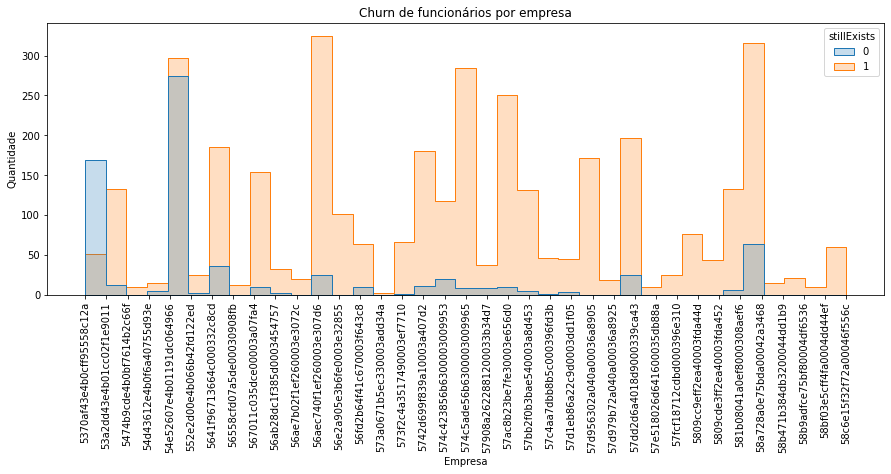

In [44]:
plt.figure(figsize=(15,5))

fig = sns.histplot(data=df_churn, 
                   x='companyAlias',
                   hue='stillExists',
                   discrete=False,
                   element='step',
                   bins=37)

plt.title("Churn de funcionários por empresa")
plt.xticks(rotation=90)
plt.xlabel("Empresa")
plt.ylabel("Quantidade")

plt.show()

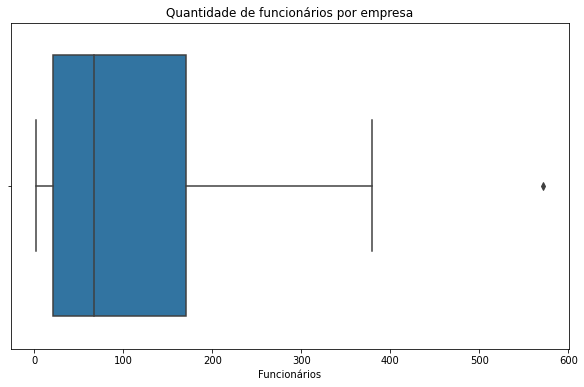

In [45]:
plt.figure(figsize=(10,6))

fig = sns.boxplot(data=df_churn[['companyAlias',
                                 'employee', 
                                 'stillExists']]
                  .groupby(['companyAlias'] )
                  .agg({'employee':'count'})
                  .reset_index(), 
                  x='employee')

plt.title("Quantidade de funcionários por empresa")
plt.xlabel("Funcionários")

plt.show()

Na distribuição da última data de participação, há uma alta concentração a partir do segundo semestre de 2016

In [46]:
df_churn['lastParticipationDate'].describe(datetime_is_numeric=True)

count                             4377
mean     2016-12-12 08:33:31.141421056
min                2014-06-07 02:00:00
25%                2016-10-21 17:25:40
50%                2017-02-22 01:00:00
75%                2017-03-17 10:45:55
max                2017-03-20 21:25:54
Name: lastParticipationDate, dtype: object

In [47]:
df_churn['lastParticipationDate'].loc[
                                      df_churn['lastParticipationDate'] 
                                      > '2016-06-01'].shape

(3995,)

<Figure size 720x432 with 0 Axes>

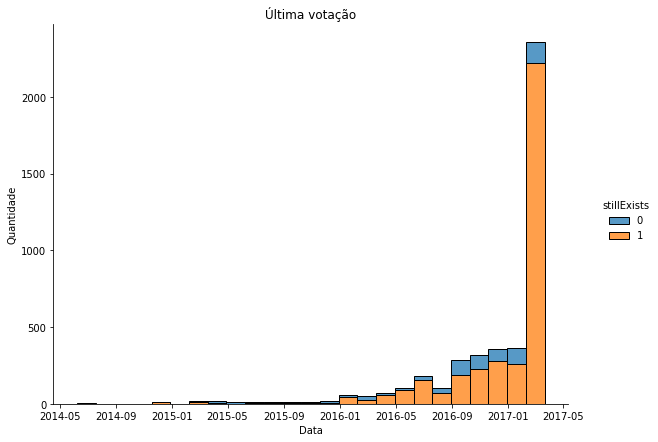

In [48]:
plt.figure(figsize=(10,6))

fig = sns.displot(data=df_churn, 
                   x='lastParticipationDate',
                   hue='stillExists',
                   multiple='stack',
                   height=6, aspect=1.4, bins=25)

plt.title("Última votação")
plt.xlabel("Data")
plt.ylabel("Quantidade")

plt.show()

Em relação à quantidade de votos por usuário (**numVotes**), os valores variam de 1 a 740, sendo que 75% dos funcionários votaram até 66 vezes.

A distribuição apresenta alguns outliers com calda muito longa

In [49]:
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4377.0,190.503084,202.257837,1.0,50.0,130.0,246.0,999.0
numVotes,4377.0,50.544208,73.246803,1.0,5.0,19.0,66.0,740.0
stillExists,4377.0,0.839159,0.367426,0.0,1.0,1.0,1.0,1.0


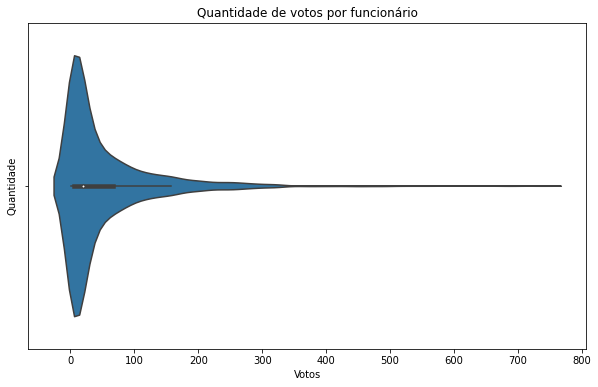

In [50]:
plt.figure(figsize=(10,6))

fig = sns.violinplot(data=df_churn, 
                     x='numVotes')

plt.title("Quantidade de votos por funcionário")
plt.xlabel("Votos")
plt.ylabel("Quantidade")
plt.show()

#### **df_votes**

Mais de 40% dos funcionários atribuíram nota 3, já aproximadamente 30% votaram entre 1 e 2

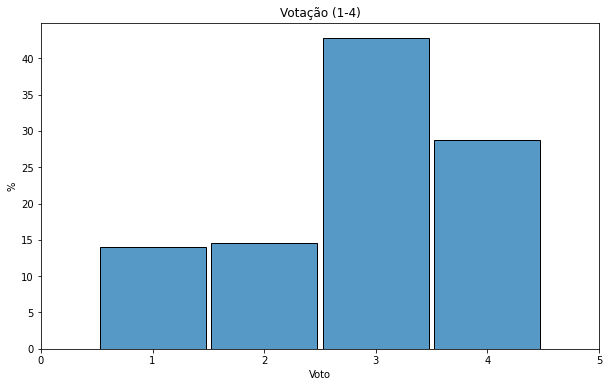

In [51]:
plt.figure(figsize=(10,6))

sns.histplot(data=df_votes, 
                   x='vote',
                   stat='percent',
                   discrete=True,
                   shrink=.95)

plt.title("Votação (1-4)")
plt.xlabel("Voto")
plt.xlim([0,5])
plt.ylabel("%")
plt.show()

Na distribuição temporal dos votos, assim como ocorreu no dataset df_churn, há uma maior concentração de votos a partir do segundo semestre de 2016, com predominância de voto 3

<Figure size 720x432 with 0 Axes>

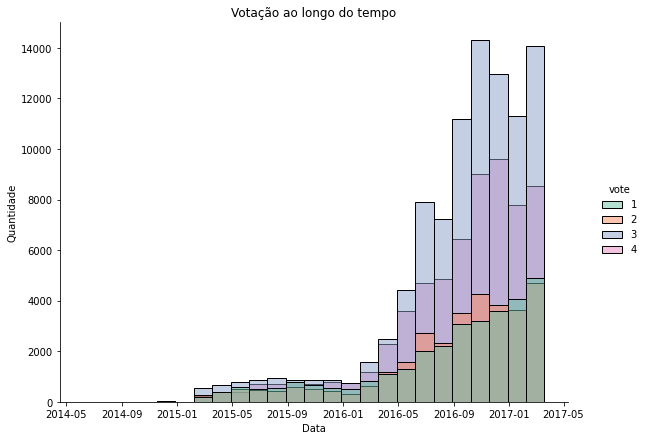

In [52]:
plt.figure(figsize=(10,6))

sns.displot(data=df_votes,
            x='voteDate', bins=25,
            height=6, aspect=1.4, hue='vote',
            palette='Set2')

plt.title("Votação ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade")

plt.show()

#### **df_comments**

Em relação à distribuição de **likes** e **dislikes** em **df_comments**, a maioria dos comentários não tiveram reações muitas reações; sendo dislike a que menos ocorre

In [53]:
df_comments[['likes', 
             'dislikes', 
             'carac']
            ].describe(percentiles=[0.05,
                                    0.15,
                                    0.25,
                                    0.5,
                                    0.75,
                                    0.9,
                                    0.99]).T

,count,mean,std,min,5%,15%,25%,50%,75%,90%,99%,max
likes,38993.0,7.002488,7.773628,0.0,0.0,1.0,2.0,4.0,10.0,17.0,36.00,86.0
dislikes,38993.0,1.297977,2.748012,0.0,0.0,0.0,0.0,0.0,1.0,4.0,13.00,53.0
carac,38993.0,102.140128,202.662014,0.0,9.0,18.8,27.0,57.0,118.0,229.0,689.08,29057.0


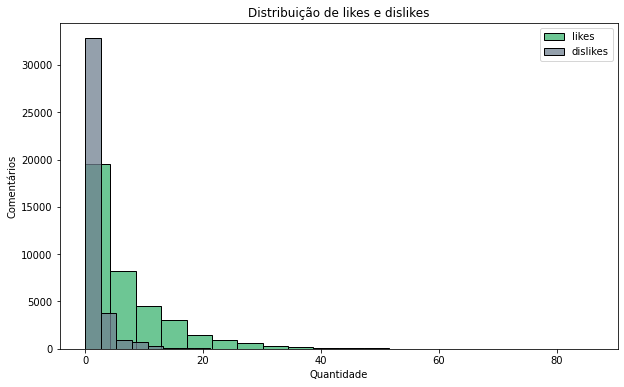

In [54]:
plt.figure(figsize=(10,6))

sns.histplot(data=df_comments, 
             x='likes',
             color='mediumseagreen', bins=20
             )

sns.histplot(data=df_comments, 
             x='dislikes',
             color='slategray', bins=20
             )

plt.title("Distribuição de likes e dislikes")
plt.xlabel("Quantidade")
plt.ylabel("Comentários")
plt.legend(loc='upper right',  
           labels=['likes', 'dislikes'])

plt.show()

Assim como ocorreu com as votações, a maior parte dos comentários se concentra a partir do segundo semestre de 2016

<Figure size 720x432 with 0 Axes>

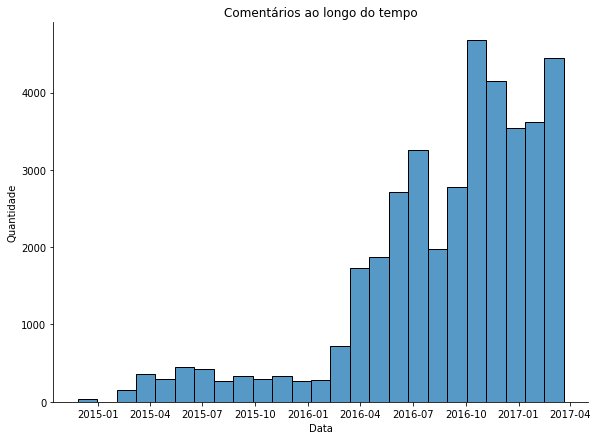

In [55]:
plt.figure(figsize=(10,6))

sns.displot(data=df_comments,
            x='commentDate', bins=25,
            height=6, aspect=1.4)

plt.title("Comentários ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade")

plt.show()

### Construção de dados


#### df_votes e df_churn

Unir os dataframes **df_votes** com **df_churn** para visualizar o comportamento dos votos, quando começaram e a última participação e se o funcionário ainda está na empresa.


In [56]:
df_churn.shape

(4377, 5)

In [57]:
df_votes.shape

(221145, 4)

In [58]:
votes_merge = df_churn.merge(df_votes, 
                on=['companyAlias', 
                    'employee'], 
                how='left')
votes_merge.shape

(221145, 7)

In [59]:
votes_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221145 entries, 0 to 221144
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   employee               221145 non-null  int64         
 1   companyAlias           221145 non-null  object        
 2   numVotes               221145 non-null  int64         
 3   lastParticipationDate  221145 non-null  datetime64[ns]
 4   stillExists            221145 non-null  int64         
 5   voteDate               221145 non-null  datetime64[ns]
 6   vote                   221145 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 13.5+ MB


##### Verificar a diferença em dias entre a **lastParticipationDate** e o voto (**voteDate**)

Como não existem valores negativos, não será alterada

In [60]:
votes_merge['diffDaysVote'] = (
    votes_merge['lastParticipationDate'] 
    - votes_merge['voteDate']
    ).dt.days

In [61]:
votes_merge['diffDaysVote'].describe()

count    221145.000000
mean        145.058107
std         135.593954
min           0.000000
25%          46.000000
50%         112.000000
75%         200.000000
max         770.000000
Name: diffDaysVote, dtype: float64

In [62]:
votes_merge.head(3)

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,voteDate,vote,diffDaysVote
0,11,5370af43e4b0cff95558c12a,1,2014-06-07 02:00:00,0,2014-06-07 02:00:00,3,0
1,12,5370af43e4b0cff95558c12a,1,2014-06-07 02:00:00,0,2014-06-07 02:00:00,1,0
2,13,5370af43e4b0cff95558c12a,1,2014-06-07 02:00:00,0,2014-06-07 02:00:00,2,0


<Figure size 720x432 with 0 Axes>

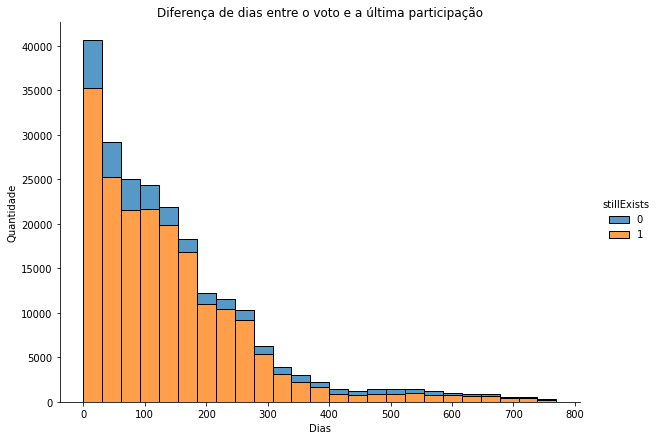

In [63]:
plt.figure(figsize=(10,6))

sns.displot(data=votes_merge, 
            x='diffDaysVote',
            hue='stillExists',
            multiple='stack',
            height=6, aspect=1.4, bins=25)

plt.title("Diferença de dias entre o voto e a última participação")
plt.xlabel("Dias")
plt.ylabel("Quantidade")

plt.show()

##### Agrupar a base **votes_merge** por companyAlias e employee
* **vote**: mean, mode, min, max e count
* **diffDaysVote**: min, max e median

In [64]:
votes_merge.shape

(221145, 8)

In [65]:
def mode(x):
    return pd.Series.mode(x)[0]

In [66]:
votes_group = votes_merge.groupby(
    ['companyAlias', 
     'employee',
     'numVotes',
     'stillExists',
     'lastParticipationDate']
     ).agg({'vote': ['mean',
                     mode,
                     'min',
                     'max',
                     'count'],
            'diffDaysVote': ['min',
                             'max',
                             'median']}
     ).reset_index()

votes_group.shape

(4377, 13)

In [67]:
votes_group.columns = [
                 '.'.join(map(str, col)).strip() 
                 if col[1] != "" 
                 else col[0] 
                 for col in votes_group.columns.values
                 ]

In [68]:
votes_group.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
employee,4377.0,190.503084,1.0,50.0,130.0,246.0,999.0,202.257837
numVotes,4377.0,50.544208,1.0,5.0,19.0,66.0,740.0,73.246803
stillExists,4377.0,0.839159,0.0,1.0,1.0,1.0,1.0,0.367426
lastParticipationDate,4377,2016-12-12 08:33:31.141421312,2014-06-07 02:00:00,2016-10-21 17:25:40,2017-02-22 01:00:00,2017-03-17 10:45:55,2017-03-20 21:25:54,NaN
vote.mean,4377.0,2.945912,1.0,2.64,3.0,3.333333,4.0,0.651171
vote.mode,4377.0,2.96573,1.0,3.0,3.0,4.0,4.0,0.84693
vote.min,4377.0,1.908613,1.0,1.0,2.0,3.0,4.0,0.956246
vote.max,4377.0,3.696596,1.0,3.0,4.0,4.0,4.0,0.558522
vote.count,4377.0,50.524332,1.0,5.0,19.0,66.0,740.0,73.17527
diffDaysVote.min,4377.0,0.005026,0.0,0.0,0.0,0.0,7.0,0.164134


Como há uma diferença entre **numVotes** e **vote.count**, será considerada a coluna **vote.count**

In [69]:
votes_group['diffVotes'] = votes_group['numVotes'] - votes_group['vote.count']
votes_group.loc[votes_group['diffVotes'] > 0].shape

(21, 14)

In [70]:
votes_group.drop(columns=['diffVotes', 'numVotes'], inplace=True)
votes_group.shape

(4377, 12)

#### **df_comments** e **df_churn**

Unir esses datasets para calcular a diferença entre **commentDate** e **lastParticipationDate**


In [71]:
df_comments.shape

(38993, 7)

In [72]:
df_churn.shape

(4377, 5)

In [73]:
comments_merge = df_churn.merge(df_comments,
                            on=['companyAlias',
                                'employee'],
                            how='inner')
comments_merge.drop(columns='numVotes', inplace=True)
comments_merge.shape

(38993, 9)

In [74]:
comments_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38993 entries, 0 to 38992
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   employee               38993 non-null  int64         
 1   companyAlias           38993 non-null  object        
 2   lastParticipationDate  38993 non-null  datetime64[ns]
 3   stillExists            38993 non-null  int64         
 4   commentId              38993 non-null  object        
 5   likes                  38993 non-null  int64         
 6   dislikes               38993 non-null  int64         
 7   commentDate            38993 non-null  datetime64[ns]
 8   carac                  38993 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 3.0+ MB


##### Verificar a quantidade de dias entre **lastParticipationDate** e **commentDate**

Remover os comentários com valores negativos da base

In [75]:
comments_merge['diffDaysComment'] = (
    comments_merge['lastParticipationDate'] 
    - comments_merge['commentDate']
    ).dt.days

In [76]:
comments_merge['diffDaysComment'].describe()

count    38993.000000
mean       151.719565
std        141.744720
min        -90.000000
25%         46.000000
50%        118.000000
75%        216.000000
max        770.000000
Name: diffDaysComment, dtype: float64

In [77]:
comments_merge.loc[comments_merge['diffDaysComment'] < 0].shape

(17, 10)

In [78]:
comments_merge = comments_merge.loc[comments_merge['diffDaysComment'] >= 0]
comments_merge.shape

(38976, 10)

<Figure size 720x432 with 0 Axes>

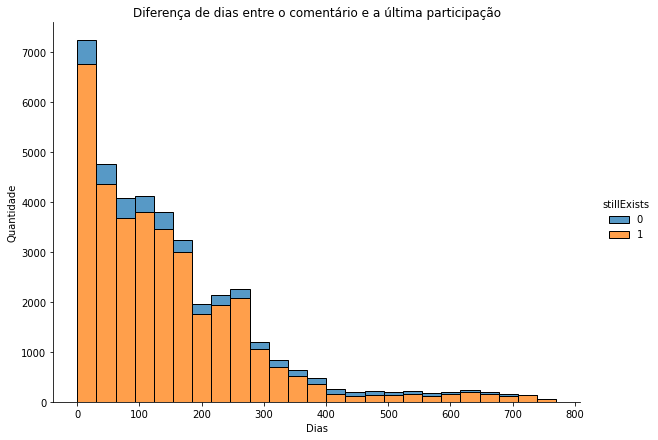

In [79]:
plt.figure(figsize=(10,6))

sns.displot(data=comments_merge, 
            x='diffDaysComment',
            hue='stillExists',
            multiple='stack',
            height=6, aspect=1.4, bins=25)

plt.title("Diferença de dias entre o comentário e a última participação")
plt.xlabel("Dias")
plt.ylabel("Quantidade")

plt.show()

In [80]:
comments_merge.head(3)

,employee,companyAlias,lastParticipationDate,stillExists,commentId,likes,dislikes,commentDate,carac,diffDaysComment
0,319,5370af43e4b0cff95558c12a,2017-03-16 11:38:22,1,58ca6b3992db640004f95491,1,1,2017-03-16 11:38:22,18,0
1,274,5370af43e4b0cff95558c12a,2016-12-22 21:08:55,1,585c32ffac0fe00004b24d3a,2,0,2016-12-22 21:08:55,28,0
2,274,5370af43e4b0cff95558c12a,2016-12-22 21:08:55,1,584ff3820b45f50004cb1c36,1,0,2016-12-13 14:10:37,25,9


##### Agrupar a base **comments_merge** por **companyAlias**, **employee** e **stillExists**
* **commentId**: count
* **likes**: mean, min e max
* **dislikes**: mean, min e max
* **carac**: mean, min e max
* **diffDays**: min, max e median

In [81]:
comments_group = comments_merge.groupby(
    ['companyAlias', 
     'employee',
     'stillExists',
     'lastParticipationDate']
     ).agg({'likes': ['mean',
                      'min',
                      'max'],
            'dislikes': ['mean',
                         'min',
                         'max'],
            'carac': ['mean',
                      'min',
                      'max'],
            'diffDaysComment': ['min', 
                                'max',
                                'median'],
            'commentId': 'count'
            }
     ).reset_index()

comments_group.shape

(2879, 17)

In [82]:
comments_group.columns = [
                 '.'.join(map(str, col)).strip() 
                 if col[1] != "" 
                 else col[0] 
                 for col in comments_group.columns.values
                 ]

In [83]:
comments_group.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
employee,2879.0,170.659951,1.0,42.0,118.0,227.0,999.0,182.272951
stillExists,2879.0,0.936784,0.0,1.0,1.0,1.0,1.0,0.243394
lastParticipationDate,2879,2017-01-03 22:34:41.914553600,2014-11-25 19:02:25,2016-11-23 01:00:00,2017-03-09 01:00:00,2017-03-19 01:00:00,2017-03-20 21:25:54,NaN
likes.mean,2879.0,6.489082,0.0,2.0,5.0,9.256579,46.0,5.731845
likes.min,2879.0,2.312956,0.0,0.0,1.0,3.0,46.0,4.201204
likes.max,2879.0,14.293852,0.0,4.0,11.0,21.0,86.0,12.964395
dislikes.mean,2879.0,1.141794,0.0,0.0,0.555556,1.5,33.0,1.875563
dislikes.min,2879.0,0.246613,0.0,0.0,0.0,0.0,33.0,1.367866
dislikes.max,2879.0,4.261549,0.0,0.0,2.0,6.0,53.0,5.820038
carac.mean,2879.0,88.236325,0.75,38.207143,66.777778,110.661616,880.5,78.714626


In [84]:
comments_group.head(3)

,companyAlias,employee,stillExists,lastParticipationDate,likes.mean,likes.min,likes.max,dislikes.mean,dislikes.min,dislikes.max,carac.mean,carac.min,carac.max,diffDaysComment.min,diffDaysComment.max,diffDaysComment.median,commentId.count
0,5370af43e4b0cff95558c12a,18,1,2017-03-12 01:00:00,5.480000,1,18,0.580000,0,3,51.24,14,139,37,382,326.0,50
1,5370af43e4b0cff95558c12a,20,1,2016-12-16 01:00:00,1.400000,0,3,0.200000,0,1,8.20,0,30,16,238,27.0,5
2,5370af43e4b0cff95558c12a,21,1,2016-12-27 01:00:00,3.416667,0,8,0.333333,0,2,53.00,8,168,5,308,268.0,12


#### **votes_group** e **comments_group**

Criar uma nova base para transformação do dataset final



In [85]:
votes_group.shape

(4377, 12)

In [86]:
comments_group.shape

(2879, 17)

In [87]:
churn_merge = votes_group.merge(
    comments_group, 
    on=['companyAlias',
        'employee',
        'stillExists',
        'lastParticipationDate'],
    how='left'
)
churn_merge.shape

(4377, 25)

In [88]:
churn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   companyAlias            4377 non-null   object        
 1   employee                4377 non-null   int64         
 2   stillExists             4377 non-null   int64         
 3   lastParticipationDate   4377 non-null   datetime64[ns]
 4   vote.mean               4377 non-null   float64       
 5   vote.mode               4377 non-null   int64         
 6   vote.min                4377 non-null   int64         
 7   vote.max                4377 non-null   int64         
 8   vote.count              4377 non-null   int64         
 9   diffDaysVote.min        4377 non-null   int64         
 10  diffDaysVote.max        4377 non-null   int64         
 11  diffDaysVote.median     4377 non-null   float64       
 12  likes.mean              2879 non-null   float64 

In [89]:
churn_merge.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
employee,4377.0,190.503084,1.0,50.0,130.0,246.0,999.0,202.257837
stillExists,4377.0,0.839159,0.0,1.0,1.0,1.0,1.0,0.367426
lastParticipationDate,4377,2016-12-12 08:33:31.141421312,2014-06-07 02:00:00,2016-10-21 17:25:40,2017-02-22 01:00:00,2017-03-17 10:45:55,2017-03-20 21:25:54,NaN
vote.mean,4377.0,2.945912,1.0,2.64,3.0,3.333333,4.0,0.651171
vote.mode,4377.0,2.96573,1.0,3.0,3.0,4.0,4.0,0.84693
vote.min,4377.0,1.908613,1.0,1.0,2.0,3.0,4.0,0.956246
vote.max,4377.0,3.696596,1.0,3.0,4.0,4.0,4.0,0.558522
vote.count,4377.0,50.524332,1.0,5.0,19.0,66.0,740.0,73.17527
diffDaysVote.min,4377.0,0.005026,0.0,0.0,0.0,0.0,7.0,0.164134
diffDaysVote.max,4377.0,142.645419,0.0,19.0,107.0,215.0,770.0,153.462729


### Limpeza dos dados

Com um dataset estruturado, é necessário terminar de limpar os dados.


#### a) Seleção do range de data a ser considerado para análise

<Figure size 720x432 with 0 Axes>

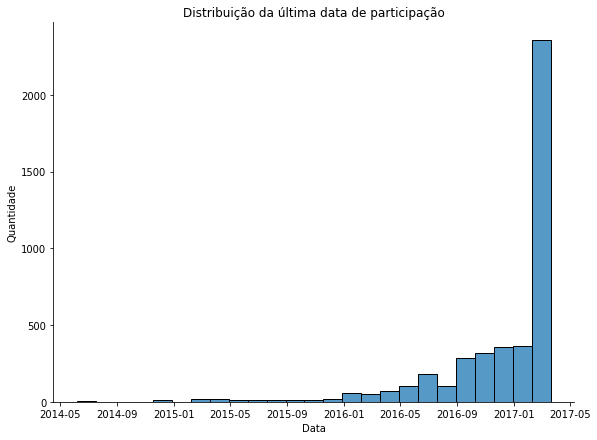

In [90]:
plt.figure(figsize=(10,6))

sns.displot(data=churn_merge,
            x='lastParticipationDate', bins=25,
            height=6, aspect=1.4)

plt.title("Distribuição da última data de participação")
plt.xlabel("Data")
plt.ylabel("Quantidade")

plt.show()

Remover os registros anteriores a Abril de 2016 para considerar histórico de 1 ano

In [91]:
churn_merge.shape

(4377, 25)

In [92]:
churn_merge = churn_merge.loc[churn_merge['lastParticipationDate'] >= '2016-04-01']
churn_merge.shape

(4118, 25)

<Figure size 720x432 with 0 Axes>

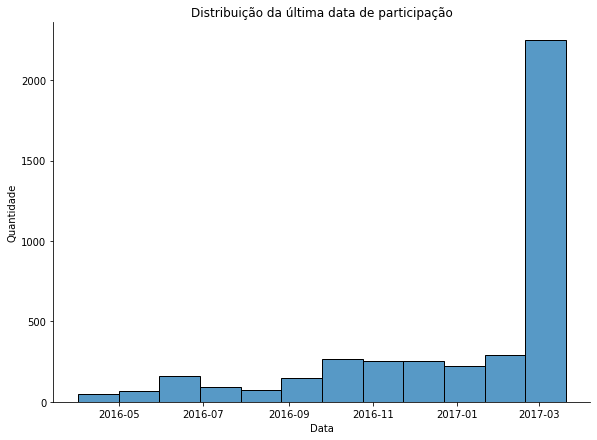

In [93]:
plt.figure(figsize=(10,6))

sns.displot(data=churn_merge,
            x='lastParticipationDate', bins=12,
            height=6, aspect=1.4)

plt.title("Distribuição da última data de participação")
plt.xlabel("Data")
plt.ylabel("Quantidade")

plt.show()

#### b) Análise dos nulos e como tratá-los

Existem mais de 1300 valores nulos, que se referem a funcionários que não comentáram na plataforma:

* **likes.mean**: substituir pela média geral para não impactar a feature
* **likes.min**: substituir pela média geral para não impactar a feature
* **likes.max**: substituir pela média geral para não impactar a feature
* **dislikes.mean**: substituir pela média geral para não impactar a feature
* **dislikes.min**: substituir pela média geral para não impactar a feature
* **dislikes.max**: substituir pela média geral para não impactar a feature
* **carac.mean**: substituir pela média geral para não impactar a feature
* **carac.min**: substituir pela média geral para não impactar a feature
* **carac.max**: substituir pela média geral para não impactar a feature
* **diffDaysComment.min**: substituir pela mediana geral para não impactar a feature
* **diffDaysComment.max**: substituir pela mediana geral para não impactar a feature
* **diffDaysComment.median**: substituir pela mediana geral para não impactar a feature
* **commentId.count**: substituir por 0


In [94]:
churn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4118 entries, 7 to 4376
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   companyAlias            4118 non-null   object        
 1   employee                4118 non-null   int64         
 2   stillExists             4118 non-null   int64         
 3   lastParticipationDate   4118 non-null   datetime64[ns]
 4   vote.mean               4118 non-null   float64       
 5   vote.mode               4118 non-null   int64         
 6   vote.min                4118 non-null   int64         
 7   vote.max                4118 non-null   int64         
 8   vote.count              4118 non-null   int64         
 9   diffDaysVote.min        4118 non-null   int64         
 10  diffDaysVote.max        4118 non-null   int64         
 11  diffDaysVote.median     4118 non-null   float64       
 12  likes.mean              2776 non-null   float64 

In [95]:
churn_merge.loc[churn_merge['likes.mean'].isna()].shape

(1342, 25)

In [96]:
churn_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4118.0,191.079650,204.619376,1.00,51.000000,130.000000,241.000000,999.0
stillExists,4118.0,0.859641,0.347402,0.00,1.000000,1.000000,1.000000,1.0
vote.mean,4118.0,2.955089,0.638927,1.00,2.661076,3.000000,3.333333,4.0
vote.mode,4118.0,2.981302,0.834576,1.00,3.000000,3.000000,4.000000,4.0
vote.min,4118.0,1.894852,0.947168,1.00,1.000000,2.000000,3.000000,4.0
vote.max,4118.0,3.715639,0.533095,1.00,3.250000,4.000000,4.000000,4.0
vote.count,4118.0,52.481302,74.206072,1.00,6.000000,21.000000,70.000000,740.0
diffDaysVote.min,4118.0,0.004857,0.166332,0.00,0.000000,0.000000,0.000000,7.0
diffDaysVote.max,4118.0,147.064837,154.740693,0.00,21.000000,113.000000,221.750000,770.0
diffDaysVote.median,4118.0,79.198397,88.184382,0.00,10.500000,57.500000,118.500000,708.5


In [97]:
mean_cols = ['likes.mean', 'likes.min', 'likes.max', 
             'dislikes.mean', 'dislikes.min', 'dislikes.max', 
             'carac.mean', 'carac.min', 'carac.max']
median_cols = ['diffDaysComment.min',
               'diffDaysComment.max',
               'diffDaysComment.median']
zero_cols = ['commentId.count']

In [98]:
for col in mean_cols:
  mean = churn_merge[col].mean()
  churn_merge.loc[churn_merge[col].isna(), col] = mean
  print(f"{col}: substituindo os nulos por {mean}")

likes.mean: substituindo os nulos por 6.631448203475065
likes.min: substituindo os nulos por 2.3447406340057637
likes.max: substituindo os nulos por 14.630043227665706
dislikes.mean: substituindo os nulos por 1.1693803788772703
dislikes.min: substituindo os nulos por 0.24711815561959655
dislikes.max: substituindo os nulos por 4.38328530259366
carac.mean: substituindo os nulos por 89.61363089002553
carac.min: substituindo os nulos por 31.2921469740634
carac.max: substituindo os nulos por 252.24387608069165


In [99]:
for col in median_cols:
  median = churn_merge[col].median()
  churn_merge.loc[churn_merge[col].isna(), col] = median
  print(f"{col}: substituindo os nulos por {median}")

diffDaysComment.min: substituindo os nulos por 9.0
diffDaysComment.max: substituindo os nulos por 129.0
diffDaysComment.median: substituindo os nulos por 84.5


In [100]:
for col in zero_cols:
  churn_merge.loc[churn_merge[col].isna(), col] = 0
  print(f"{col}: substituindo os nulos por 0")

commentId.count: substituindo os nulos por 0


In [101]:
churn_merge.loc[churn_merge['likes.mean'].isna()].shape

(0, 25)

#### c) Tratamento de outliers

Visualizar os percentis: 1%, 10%, 25%, 50%, 75%, 90% e 99%

Identificar as features com grande diferença entre o percentil 99% e max de acordo com o desvio padrão


In [102]:
outliers = churn_merge.describe(percentiles=[0.01,
                                  0.1,
                                  0.25,
                                  0.5,
                                  0.75,
                                  0.9,
                                  0.99]
                     ).T
outliers                    

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
employee,4118.0,191.079650,204.619376,1.00,2.170000,19.000000,51.000000,130.000000,241.000000,464.000000,921.830000,999.0
stillExists,4118.0,0.859641,0.347402,0.00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
vote.mean,4118.0,2.955089,0.638927,1.00,1.084565,2.045602,2.661076,3.000000,3.333333,3.832517,4.000000,4.0
vote.mode,4118.0,2.981302,0.834576,1.00,1.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.0
vote.min,4118.0,1.894852,0.947168,1.00,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,4.0
vote.max,4118.0,3.715639,0.533095,1.00,2.000000,3.000000,3.250000,4.000000,4.000000,4.000000,4.000000,4.0
vote.count,4118.0,52.481302,74.206072,1.00,1.000000,2.000000,6.000000,21.000000,70.000000,148.300000,320.830000,740.0
diffDaysVote.min,4118.0,0.004857,0.166332,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.0
diffDaysVote.max,4118.0,147.064837,154.740693,0.00,0.000000,1.000000,21.000000,113.000000,221.750000,317.000000,750.830000,770.0
diffDaysVote.median,4118.0,79.198397,88.184382,0.00,0.000000,0.500000,10.500000,57.500000,118.500000,175.000000,435.660000,708.5


In [103]:
outliers['out%'] = (
    (outliers['max'] - outliers['99%']) / outliers['std']
    )

outliers[
         ['std',
         '99%',
         'max',
         'out%']
         ].loc[outliers['out%'] >= 1]

,std,99%,max,out%
vote.count,74.206072,320.830000,740.0,5.648729
diffDaysVote.min,0.166332,0.000000,7.0,42.084401
diffDaysVote.median,88.184382,435.660000,708.5,3.093972
likes.mean,4.722696,23.000000,46.0,4.870099
likes.min,3.475131,18.000000,46.0,8.057251
likes.max,10.682844,52.000000,86.0,3.182673
dislikes.mean,1.555470,7.000000,33.0,16.715210
dislikes.min,1.133593,4.000000,33.0,25.582384
dislikes.max,4.826053,24.000000,53.0,6.009051
carac.mean,65.024076,358.603333,880.5,8.026207


##### Visualizar as colunas com outliers superiores

In [104]:
outliers.reset_index(inplace=True)
col_outliers = outliers['index'].loc[outliers['out%'] >= 1].tolist()

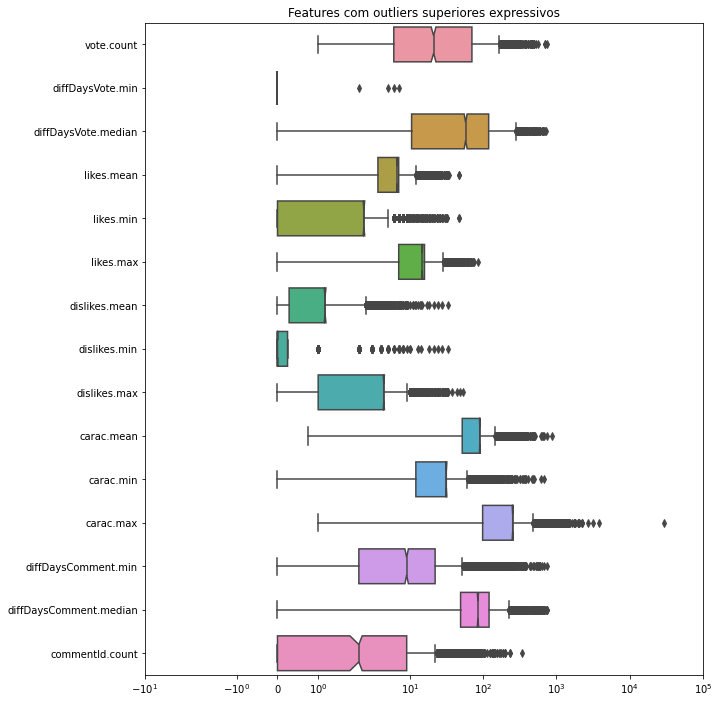

In [105]:
plt.figure(figsize=(10,12))

fig = sns.boxplot(data=churn_merge.filter(col_outliers, axis='columns'),
                  orient='h', notch=True)


fig.set_xscale('symlog')
plt.xlim([-10,10**5])
plt.title('Features com outliers superiores expressivos')
plt.show()

##### Calcular a quantidade de outiliers por coluna com o z-score, exceto **employee**

In [106]:
cols = outliers['index'].tolist()
cols.remove('employee')

col_outliers = []

for col in cols:
  z = np.abs(stats.zscore(churn_merge[col]))
  if (churn_merge[z>3].shape[0]) > 0:
    print(f"{col} - quantidade de outliers: {churn_merge[z>3].shape[0]}")
    col_outliers.append(col)

vote.mean - quantidade de outliers: 36
vote.max - quantidade de outliers: 116
vote.count - quantidade de outliers: 86
diffDaysVote.min - quantidade de outliers: 4
diffDaysVote.max - quantidade de outliers: 115
diffDaysVote.median - quantidade de outliers: 81
likes.mean - quantidade de outliers: 70
likes.min - quantidade de outliers: 104
likes.max - quantidade de outliers: 81
dislikes.mean - quantidade de outliers: 66
dislikes.min - quantidade de outliers: 45
dislikes.max - quantidade de outliers: 105
carac.mean - quantidade de outliers: 89
carac.min - quantidade de outliers: 73
carac.max - quantidade de outliers: 13
diffDaysComment.min - quantidade de outliers: 98
diffDaysComment.max - quantidade de outliers: 105
diffDaysComment.median - quantidade de outliers: 80
commentId.count - quantidade de outliers: 94


##### Remover os outliers de **numVotes** para não adicionar ao modelo

In [107]:
churn_merge.shape

(4118, 25)

In [108]:
z = np.abs(stats.zscore(churn_merge['vote.count']))
churn_merge = churn_merge[z < 3]
churn_merge.shape

(4032, 25)

##### Nas demais colunas, substituir os outliers pelos limites superiores e inferiores

In [109]:
col_outliers.remove('vote.count')

for col in col_outliers:
  limite_inferior = churn_merge[col].mean() - 3 * churn_merge[col].std()
  limite_superior = churn_merge[col].mean() + 3 * churn_merge[col].std()
  churn_merge.loc[churn_merge[col] < limite_inferior, col] = int(limite_inferior)
  churn_merge.loc[churn_merge[col] > limite_superior, col] = int(limite_superior)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [110]:
churn_merge.describe(percentiles=[0.01,
                                  0.1,
                                  0.25,
                                  0.5,
                                  0.75,
                                  0.9,
                                  0.99]
                     ).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
employee,4032.0,192.212054,205.965350,1.00,2.310000,19.000000,51.000000,131.000000,243.000000,468.000000,924.07,999.000000
stillExists,4032.0,0.860119,0.346906,0.00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
vote.mean,4032.0,2.960151,0.633997,1.00,1.092728,2.058824,2.666667,3.000000,3.333333,3.830906,4.00,4.000000
vote.mode,4032.0,2.986607,0.825252,1.00,1.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.00,4.000000
vote.min,4032.0,1.911706,0.948771,1.00,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.00,4.000000
vote.max,4032.0,3.716518,0.510612,2.00,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.00,4.000000
vote.count,4032.0,45.905506,57.910857,1.00,1.000000,2.000000,6.000000,20.000000,65.000000,133.000000,249.00,275.000000
diffDaysVote.min,4032.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
diffDaysVote.max,4032.0,136.478671,133.881934,0.00,0.000000,1.000000,21.000000,107.500000,208.000000,300.000000,572.00,572.000000
diffDaysVote.median,4032.0,73.406746,73.931964,0.00,0.000000,0.500000,10.500000,55.000000,113.625000,167.500000,330.00,330.500000


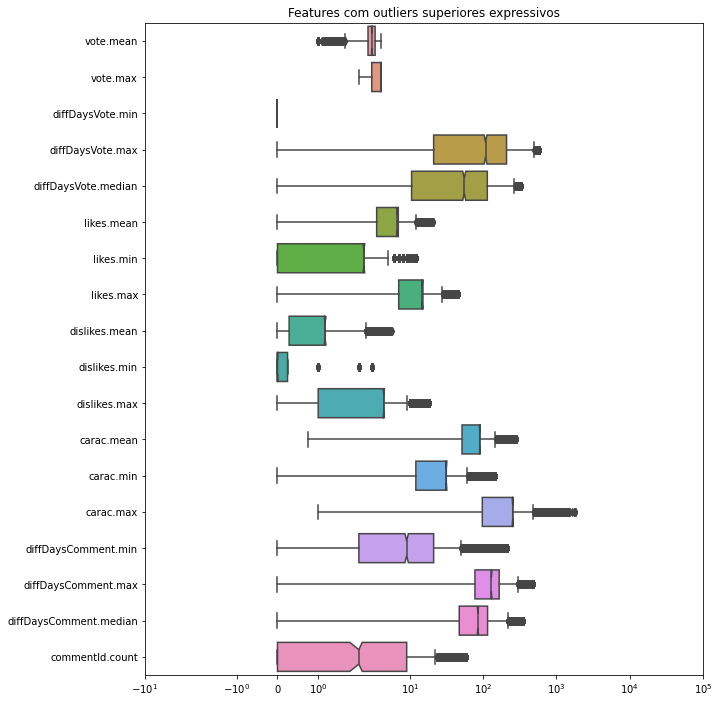

In [111]:
plt.figure(figsize=(10,12))

fig = sns.boxplot(data=churn_merge.filter(col_outliers, axis='columns'),
                  orient='h', notch=True)


fig.set_xscale('symlog')
plt.xlim([-10,10**5])
plt.title('Features com outliers superiores expressivos')
plt.show()

## Finalização

Dataset concluído, em seguida veremos como enriquecer os dados a partir dos existentes

In [112]:
churn_merge.head()

,companyAlias,employee,stillExists,lastParticipationDate,vote.mean,vote.mode,vote.min,vote.max,vote.count,diffDaysVote.min,...,dislikes.mean,dislikes.min,dislikes.max,carac.mean,carac.min,carac.max,diffDaysComment.min,diffDaysComment.max,diffDaysComment.median,commentId.count
7,5370af43e4b0cff95558c12a,18,1,2017-03-12 01:00:00,3.192118,3,1,4,203,0,...,0.580000,0.0,3.0,51.240000,14.0,139.0,37.0,382.0,326.0,50.0
8,5370af43e4b0cff95558c12a,20,1,2016-12-16 01:00:00,3.666667,4,2,4,51,0,...,0.200000,0.0,1.0,8.200000,0.0,30.0,16.0,238.0,27.0,5.0
9,5370af43e4b0cff95558c12a,21,1,2016-12-27 01:00:00,3.680556,4,3,4,72,0,...,0.333333,0.0,2.0,53.000000,8.0,168.0,5.0,308.0,268.0,12.0
10,5370af43e4b0cff95558c12a,22,0,2016-05-26 09:16:56,3.250000,3,1,4,20,0,...,0.777778,0.0,4.0,71.777778,14.0,165.0,0.0,71.0,56.5,18.0
11,5370af43e4b0cff95558c12a,23,1,2016-11-12 01:00:00,3.117647,3,2,4,34,0,...,0.000000,0.0,0.0,12.000000,8.0,16.0,53.0,239.0,146.0,2.0


## Exportar arquivos

In [113]:
churn_merge.to_csv('/content/churn_merge.csv')
df_churn.to_csv('/content/churn_clean.csv')
df_interactions.to_csv('/content/commentInteractions_clean.csv')
df_comments.to_csv('/content/comments_clean_anonimized_clean.csv')
df_votes.to_csv('/content/votes_clean.csv')